<a href="https://colab.research.google.com/github/Alex-Devoid/ST-554-Project1/blob/main/Task2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Devoid, Emma Martinez, Lanette Tyler   
ST 554 Project 1 Spring 2026   
Task 2 EDA Lanette Tyler

# Introduction

## Purpose     
The purpose of this project is to analyze the [air quality data set](https://archive.ics.uci.edu/dataset/360/air+quality) available from the UCI Machine Learning Repository. The data set includes non-true sensor measurements of air pollutant concentrations, gold-standard or true air pollutant concetrations measured by a reference analyzer, and corresponding weather data. This analysis includes three tasks:

1.   **Writing two gradient descent type algorithms** to find the optimal constant to use for squared error loss and to find the optimal intercept and slope from a simple linear regression (SLR) model   

2.   **Extensive Exploratory Data Analysis** to understand the relationships between the true C6H6 values and the sensor values, and between the true C6H6 values and the weather variables   

3.   **Data Modeling** using a cross-validation algorithm to evaluate a simple linear regression (SLR) model using true CO to predict true C6H6, and a multiple linear regression model in the time series setting to predict true C6H6 using true CO, temperature, relative humidity, and absolute humidity

## Data
The data set contains 9358 observations of true pollutant concentrations, sensor-read pollutant concentrations, and weather factors. The observations were made from March, 2004, to Febraury, 2005, in a significantly polluted area at road level in a city in Italy. Each observation represents an hourly average.


Specific variables in the data set are as follows:   

-   True C6H6 concentration (micrograms/cubic meter)

-   True CO concentration (mg/cubic meter)

-   CO Sensor Response     

-   True Non-metanic hydrocarbon (NMHC) concentration (micrograms/cubic meter)      

-   NMHC sensor response   

-   True NOx concentration (parts per billion)   

-   NOx sensor response   

-   True NO2 concentration (micrograms/cubic meter)

-   NO2 sensor response  

-   O3 sensor response   

-   Temperature (C)   

-   Relative humidity (%)

-   Absolute humidity


# Task 2: Exploratory Data Analysis

This exploratory data analysis investigates the relationships between the true C6H6 concentration and the sensor readings for CO, NMHC, NOx, NO2, and O3, and between the true C6H6 concentration and the weather variables temperature, relative humidity, and absolute humidity.

## Preliminary Data Tasks

### Install and Import Modules

In [353]:
#install module for reading data from UCI
!pip install ucimlrepo

In [354]:
#import modules
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
#import matplotlib as mplt
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from pandas.api.types import CategoricalDtype

### Read in data

In [355]:
#fetch dataset
air_quality = fetch_ucirepo(id=360)

#data (as pandas dataframes)
air_qu = air_quality.data.features

#take a look at the first few observations
air_qu.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### Data Cleaning and Validation

In [356]:
#look at the info about the data
air_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


#### Rename variables and subset data

In [357]:
#rename vars for convenience
air_qu = air_qu.rename(columns = {"PT08.S1(CO)": "CO", "C6H6(GT)": "true_C6H6",
                              "PT08.S2(NMHC)": "NMHC", "PT08.S3(NOx)": "NOx",
                              "PT08.S4(NO2)": "NO2", "PT08.S5(O3)": "O3",
                              "Date": "date", "Time": "time", "T": "temp",
                              "RH": "rel_hum", "AH": "abs_hum"})

#subset data to variables of interest in this analysis
air_qu = air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3", "date", "time",
                 "temp", "rel_hum", "abs_hum"]]

#### Remove missing values

Check for explicit missing values.

In [358]:
air_qu.isnull().sum()

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


The zeros in each row above indicate that there are no explicit missing values. In this datset, missing values are represented by -200. Now check for -200.

In [359]:
air_qu.isin([-200.0]).any()

,0
true_C6H6,True
CO,True
NMHC,True
NOx,True
NO2,True
O3,True
date,False
time,False
temp,True
rel_hum,True


The variable columns listed above with "True" values contain -200. Replace them with np.nan for easier removal.

In [360]:
#replace -200.0 with np.nan
air_qu = air_qu.replace([-200.0],[np.nan])
air_qu.isnull().sum() #see the nan's

,0
true_C6H6,366
CO,366
NMHC,366
NOx,366
NO2,366
O3,366
date,0
time,0
temp,366
rel_hum,366


Remove the observations/rows with NaN values.

In [361]:
#remove the rows with np.nan values
air_qu = air_qu.dropna()
air_qu.isnull().sum() #see that there are no nan's left

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


Rows with missing values have been removed. Now let's reset the index.

In [362]:
#fix index
air_qu = air_qu.reset_index(drop = True)

#### Update Data Types and Add Columns

Change the values in the date column from string type to datetime.date type. Add columns for year, month and week by extracting the values from the date.

In [363]:
for i in range(0, len(air_qu)):
    air_qu.loc[i, "date"] = datetime.strptime(air_qu.loc[i, "date"], "%m/%d/%Y").date()
    air_qu.loc[i, "year"] = air_qu.date[i].year
    air_qu.loc[i, "month"] = air_qu.date[i].month
    air_qu.loc[i, "week"] = air_qu.date[i].strftime("%V")

#make the new columns integers
air_qu.year = air_qu.year.astype("int64")
air_qu.month = air_qu.month.astype("int64")
air_qu.week = air_qu.week.astype("int64")

#air_qu.head() #take a look at the results

Change the values in the time column to simple integers. Rename the time column as hour.

In [364]:
#change time values to simple integers
for i in range(0, len(air_qu)):
    air_qu.loc[i, "time"] = air_qu.loc[i, "time"][:-6]

#rename time column as hour column
air_qu = air_qu.rename(columns = {"time": "hour"})

#change hour column to integer type
air_qu.hour = air_qu.hour.astype("int64")

Add sensor_life column to data set, derived from month data, indicating if sensor is in or out of its expecated operational range with regard to sensor age (12 months)

In [365]:
#add sensor_life column to data set

for i in range(0, len(air_qu)):
    if air_qu.year[i] == 2005:
        if air_qu.month[i] == 3:
            air_qu.loc[i, "sensor_life"] = "out_of_range"
            #print("out of range")
        elif air_qu.month[i] == 4:
            air_qu.loc[i, "sensor_life"] = "out_of_range"
            #print("out of range")
        else:
            air_qu.loc[i, "sensor_life"] = "in_range"
            #print("in range")
    else:
        air_qu.loc[i, "sensor_life"]  = "in_range"

Create new columns to hold sensor-type labels in preparation for pivoting to long data for some of the plotting.

In [366]:
#create new columns to hold sensor-type labels

for i in range(0, len(air_qu)):
    air_qu.loc[i, "CO_label"] = "CO"
    air_qu.loc[i, "NMHC_label"] = "NMHC"
    air_qu.loc[i, "NOx_label"] = "NOx"
    air_qu.loc[i, "NO2_label"] = "NO2"
    air_qu.loc[i, "O3_label"] = "O3"

Create categorical variables from numeric variables of weather conditions. Use the mean of the numeric data as the boundary between high and low categories.

In [367]:
#create categorical variables from numeric variables of weather conditions

#set reference values
mean_temp = air_qu.temp.mean()
mean_rh = air_qu.rel_hum.mean()
mean_ah = air_qu.abs_hum.mean()

#iterate to populate categorical columns
for i in range(0, len(air_qu)):
    if air_qu.loc[i, "temp"] > mean_temp:
        air_qu.loc[i, "temp_label"] = "High Temp"
    else:
        air_qu.loc[i, "temp_label"] = "Low Temp"

    if air_qu.loc[i, "rel_hum"] > mean_rh:
        air_qu.loc[i, "rh_label"] = "High RH"
    else:
        air_qu.loc[i, "rh_label"] = "Low RH"

    if air_qu.loc[i, "abs_hum"] > mean_ah:
        air_qu.loc[i, "ah_label"] = "High AH"
    else:
        air_qu.loc[i, "ah_label"] = "Low AH"

air_qu.temp_label = air_qu.temp_label.astype("category")
air_qu.rh_label = air_qu.rh_label.astype("category")
air_qu.ah_label = air_qu.ah_label.astype("category")

Create month_year combined variable, make it data-type category, and order the categories for plotting.

In [368]:
#create month_year variable as ordered category type from month and year
for i in range(0, len(air_qu)):
    air_qu.loc[i, "month_year"] = str(air_qu.loc[i, "month"]) + "_" + str(air_qu.loc[i, "year"])

air_qu["month_year"] = air_qu.month_year.astype("category")

air_qu.month_year = air_qu.month_year.cat\
                        .reorder_categories(["3_2004", "4_2004", "5_2004", "6_2004",
                                             "7_2004", "8_2004", "9_2004", "10_2004",
                                             "11_2004", "12_2004", "1_2005", "2_2005",
                                             "3_2005", "4_2005"])

#### Creata a long version of the data for some of the plots.

In [369]:
#make long data

long_data = pd.melt(air_qu,
                    id_vars=["CO_label", "NMHC_label", "NOx_label", "NO2_label",
                             "O3_label", "true_C6H6", "sensor_life", "temp_label",
                             "rh_label", "ah_label"],
                    value_vars=["CO", "NMHC", "NOx", "NO2", "O3"],
                    var_name = "sensor_type",
                    value_name = "sensor_rdg")
long_data = long_data.drop(columns = ["CO_label", "NMHC_label", "NOx_label", "NO2_label", "O3_label"])

#### Check for Reasonable Values

In [370]:
air_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   true_C6H6    8991 non-null   float64 
 1   CO           8991 non-null   float64 
 2   NMHC         8991 non-null   float64 
 3   NOx          8991 non-null   float64 
 4   NO2          8991 non-null   float64 
 5   O3           8991 non-null   float64 
 6   date         8991 non-null   object  
 7   hour         8991 non-null   int64   
 8   temp         8991 non-null   float64 
 9   rel_hum      8991 non-null   float64 
 10  abs_hum      8991 non-null   float64 
 11  year         8991 non-null   int64   
 12  month        8991 non-null   int64   
 13  week         8991 non-null   int64   
 14  sensor_life  8991 non-null   object  
 15  CO_label     8991 non-null   object  
 16  NMHC_label   8991 non-null   object  
 17  NOx_label    8991 non-null   object  
 18  NO2_label    8991 non-null  

Float-Type Column Summaries

In [371]:
air_qu.describe(include = "float")

,true_C6H6,CO,NMHC,NOx,NO2,O3,temp,rel_hum,abs_hum
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,7.449820,217.080037,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,4.400000,937.000000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,8.200000,1063.000000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,14.000000,1231.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,63.700000,2040.000000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


The float-type columns in the table above appear to be reasonable values.

Integer Type Column Summaries

In [372]:
air_qu.describe(include = "int")

,hour,year,month,week
count,8991.000000,8991.000000,8991.000000,8991.000000
mean,11.479591,2004.234568,6.327772,26.363808
std,6.913320,0.423752,3.407854,15.099842
min,0.000000,2004.000000,1.000000,1.000000
25%,5.000000,2004.000000,3.000000,13.000000
50%,11.000000,2004.000000,6.000000,26.000000
75%,17.000000,2004.000000,9.000000,40.000000
max,23.000000,2005.000000,12.000000,53.000000


The integer-type variables in the table above appear to be reasonable values.

Object Type Column Summaries

In [373]:
air_qu.describe(include = "object")

,date,sensor_life,CO_label,NMHC_label,NOx_label,NO2_label,O3_label
count,8991,8991,8991,8991,8991,8991,8991
unique,383,2,1,1,1,1,1
top,2005-04-03,in_range,CO,NMHC,NOx,NO2,O3
freq,24,8161,8991,8991,8991,8991,8991


The object-type data column detailed in the table above appears to be reasonable.

Category Type Column Summaries

In [374]:
air_qu.describe(include = "category")

,temp_label,rh_label,ah_label,month_year
count,8991,8991,8991,8991
unique,2,2,2,14
top,Low Temp,High RH,Low AH,7_2004
freq,4705,4558,4784,743


The category-type data column detailed in the table above appears to be reasonable.

# Univariate Data Summaries

## Response Variable: True Benzene (C6H6) Concentration

In [375]:
air_qu.true_C6H6.describe()[1:].round(2)

,true_C6H6
mean,10.08
std,7.45
min,0.10
25%,4.40
50%,8.20
75%,14.00
max,63.70


The response variable, true C6H6 concentration, has a mean of about 10. The variability is fairly high with a standard deviation around 7 1/2. The mean of about ten is higher than the median around 8, indicating the variable is right-skewed. The comparatively large spread between the 75th percentile of 14 and maximum value around 64 also indicates a right-skewed data set.

<Axes: title={'center': 'True C6H6 Concentration'}>

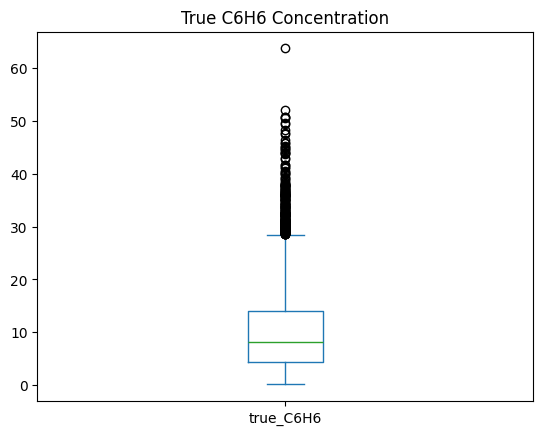

In [376]:
air_qu.true_C6H6.plot.box(title = "True C6H6 Concentration")

The boxplot of C6H6 concentration values shows a substantial number of high outliers, which is consistent with the numeric summary above indicating a right-skwed data set.

[Text(0.5, 0, 'C6H6 Concentration (micrograms per cubic meter)')]

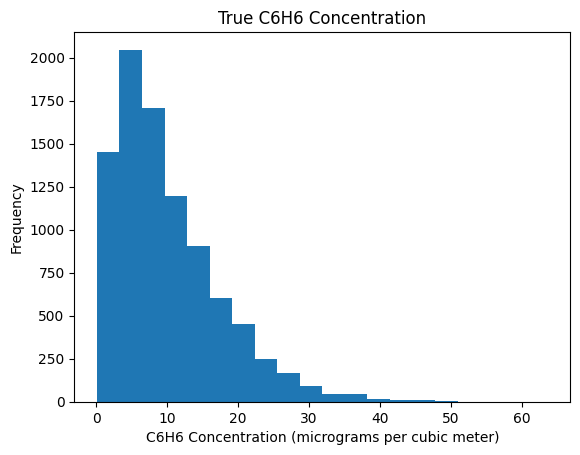

In [377]:
air_qu.true_C6H6.plot.hist(bins = 20,
    title = "True C6H6 Concentration")\
    .set(xlabel = "C6H6 Concentration (micrograms per cubic meter)")

The histogram of true C6H6 concentration also reveals a right-skewed data set.

## Predictor Variables: Sensor Readings for Environmental Pollutants

In [378]:
air_qu[["CO", "NMHC", "NOx", "NO2", "O3"]].describe()[1:].round(2)

,CO,NMHC,NOx,NO2,O3
mean,1099.83,939.15,835.49,1456.26,1022.91
std,217.08,266.83,256.82,346.21,398.48
min,647.00,383.00,322.00,551.00,221.00
25%,937.00,734.50,658.00,1227.00,731.50
50%,1063.00,909.00,806.00,1463.00,963.00
75%,1231.00,1116.00,969.50,1674.00,1273.50
max,2040.00,2214.00,2683.00,2775.00,2523.00


The mean hourly sensor readings for environmental pollutants are around 1,000, with standard deviations less than half the mean value, so less variable than the tru C6H6 concentration values. NO2 is the highest, with mean value around 1456 and standard deviation around 346. NO2 is the lowest with mean value around 835 with standard deviation about 257. Like the true C6H6 concentration values, the sensor readings seem right-skewed. This is clear because the medians are smaller than the means, except for NO2, and because the spreads from 75th percentile to maximum are coparatively large.

[Text(0, 0.5, 'Sensor-Read Concentration')]

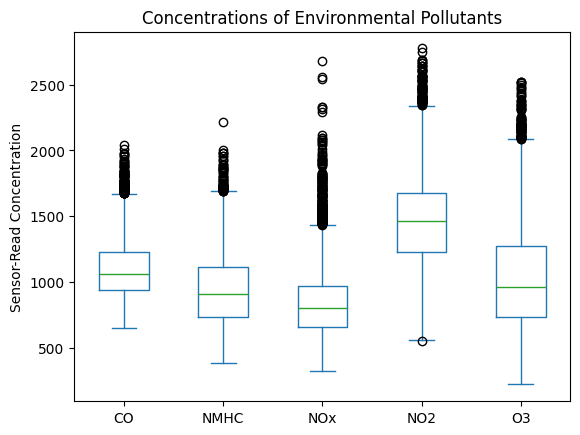

In [379]:
air_qu[["CO", "NMHC", "NOx", "NO2","O3"]].plot.box(label = "CO",
                   title = "Concentrations of Environmental Pollutants")\
                   .set(ylabel = "Sensor-Read Concentration")

There are a lot of high outliers visible on the boxplots of the sensor readings and clear overlap between the variables, with NO2 higher thn the rest.

Text(0.5, 0, 'Sensor-Read Concentration')

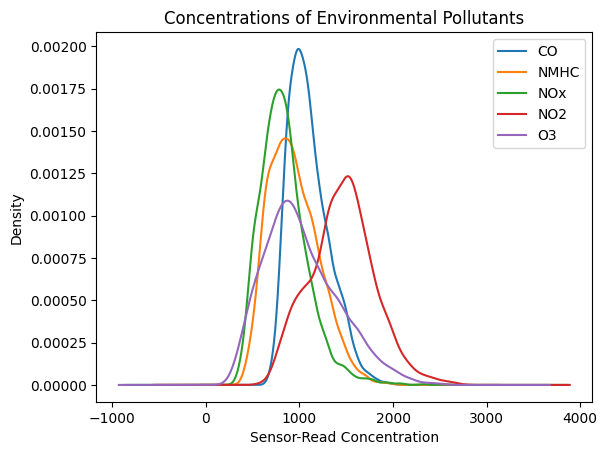

In [380]:
air_qu["CO"].plot.density(title="Concentrations of Environmental Pollutants",
                          label = "CO")
air_qu["NMHC"].plot.density(label = "NMHC")
air_qu["NOx"].plot.density(label = "NOx")
air_qu["NO2"].plot.density(label = "NO2")
air_qu["O3"].plot.density(label = "O3")
plt.legend()
plt.xlabel("Sensor-Read Concentration")

The histogram also shows NO2 as the highest sensor value and NOx as (barely) the lowest value. All pollutants except for NO2 are at least a little right-skewed. There is clear overlap between the variables.

## Predictor Variables: Environment

In [381]:
air_qu[["temp", "rel_hum", "abs_hum"]].describe()[1:]

,temp,rel_hum,abs_hum
mean,18.317829,49.234201,1.025530
std,8.832116,17.316892,0.403813
min,-1.900000,9.200000,0.184700
25%,11.800000,35.800000,0.736800
50%,17.800000,49.600000,0.995400
75%,24.400000,62.500000,1.313700
max,44.600000,88.700000,2.231000


The temperature ranges from -1.9 to 44.6 C, with a mean of 18.3, and a standard deviation less than half the mean at 8.8. The realtive humidity ranges from 9.2 to 88.7&, with mean 17.3 and standard deviation less than half that at 17.3. The absolute humidity ranges from 0.2 to 2.2 with a mean of 1.03 and standard deviation 0.4.

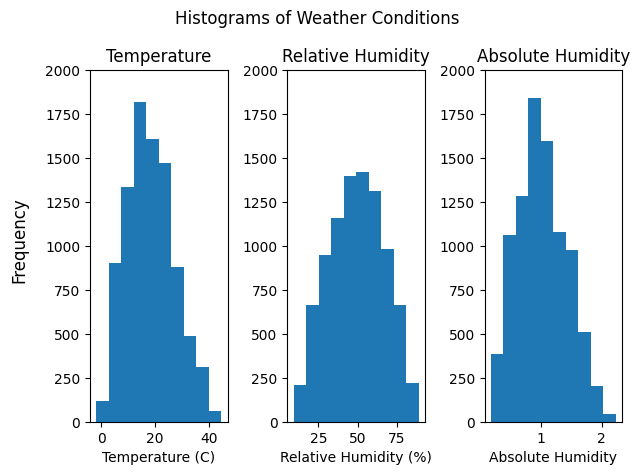

In [382]:
fig, ax = plt.subplots(1, 3)
fig.suptitle("Histograms of Weather Conditions")
fig.supylabel("Frequency")

ax[0].hist(air_qu.temp); ax[0].set_title("Temperature")
ax[0].set_xlabel("Temperature (C)")
ax[0].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[1].hist(air_qu.rel_hum); ax[1].set_title("Relative Humidity")
ax[1].set_xlabel("Relative Humidity (%)")
ax[1].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[2].hist(air_qu.abs_hum); ax[2].set_title("Absolute Humidity")
ax[2].set_xlabel("Absolute Humidity")
ax[2].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

fig.tight_layout()


The distribution of the environmental factors are pictured in the histograms above. They all look somewhat normal, whith temperature and absolute humidity a bit right-skewed.

# Multivariate Summaries

## True C6H6 and Sensor Readings

### Correlation coefficients between the true C6H6 concentration and sensor readings for environmental pollutants

In [383]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3"]].corr().iloc[0, range(1, 6)]

Correlation Coefficicients


,true_C6H6
CO,0.883795
NMHC,0.981950
NOx,-0.735744
NO2,0.765731
O3,0.865689


There is a strong positive correlation between true C6H6 conctration and CO, NMHC, NO2, and O3 sensor readings, ranging from 0.7657 up to 0.9820. The strongest correlation is to NMHC at 0.9820, and next strongest to CO at 0.8838. There is also a strong negative correlation between true C6H6 concentration and NOx, at -0.7357.

### Scatter plots of true C6H6 vs. environmental pollutant sensor readings

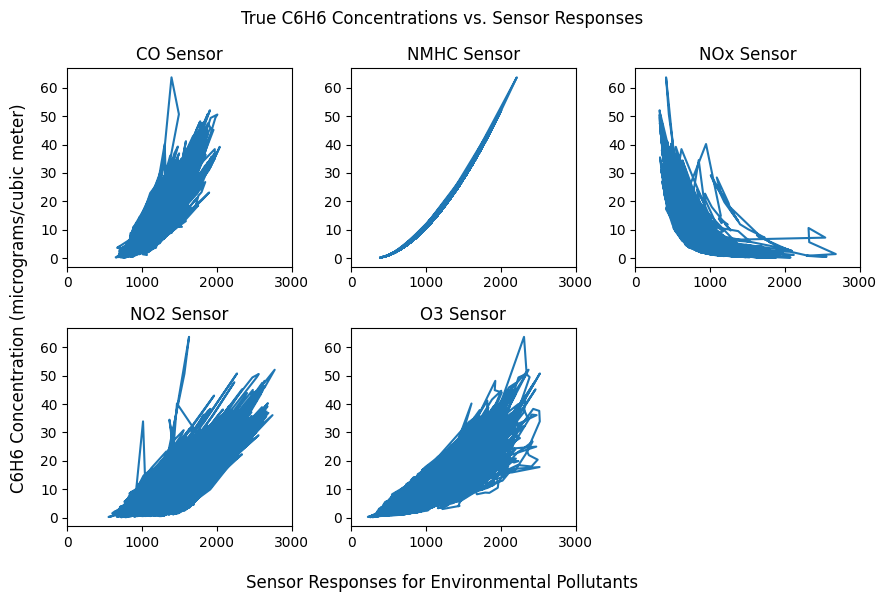

In [384]:
x1, x2, x3, x4, x5 = air_qu.CO, air_qu.NMHC, air_qu.NOx, air_qu.NO2, air_qu.O3
y = air_qu.true_C6H6

fig, (ax1, ax2) = plt.subplots(2,3, figsize = (9,6))
fig.suptitle("True C6H6 Concentrations vs. Sensor Responses")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")
fig.supxlabel("Sensor Responses for Environmental Pollutants")

ax1[0].plot(x1, y); ax1[0].set_title("CO Sensor")
ax1[0].set_xticks([0, 1000, 2000, 3000])

ax1[1].plot(x2, y); ax1[1].set_title("NMHC Sensor")
ax1[1].set_xticks([0, 1000, 2000, 3000])

ax1[2].plot(x3, y); ax1[2].set_title("NOx Sensor")
ax1[2].set_xticks([0, 1000, 2000, 3000])

ax2[0].plot(x4, y); ax2[0].set_title("NO2 Sensor")
ax2[0].set_xticks([0, 1000, 2000, 3000])

ax2[1].plot(x5, y); ax2[1].set_title("O3 Sensor")
ax2[1].set_xticks([0, 1000, 2000, 3000])

ax2[2].remove()

fig.tight_layout()

The strong correlations shown by the correlation coefficients calculated above are clear in the scatter plots, most positive and one negative. THe nearly linear shape of the NMHC scatter plot conirms the correlation coefficient of nearly 1.

## True C6H6, Sensor Readings, and Sensor Life

### Mean and Standard Deviation of True C6H6 Grouped by Sensor Life

In [385]:
air_qu.groupby("sensor_life").\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))


,mean_C6H6,std_C6H6
sensor_life,,
in_range,10.268129,7.508301
out_of_range,8.263855,6.580697


The in-range mean and standard are higher than the out-of-range, by about 2 and 1, respectively. Perhaps the values go down as the sensors deteriorate.

Correlation coefficients between the true C6H6 concentration and sensor readings for environmental pollutants grouped by sensor_life are calcualted below. Sensor_life is a categorical variable based on months in service. According to the journal article about the data, the expected operational lifespan for the sensors is 12 months. Sensor_life has two categories, either in_range (the first 12 months) or out_of_range (the final two months).

### Correlation coefficients between true C6H6 concentration and sensor readings for environmental pollutants grouped by *sensor_life*

In [386]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","sensor_life"]]\
    .groupby("sensor_life").corr()["true_C6H6"]

Correlation Coefficients


sensor_life            
in_range      true_C6H6    1.000000
              CO           0.888218
              NMHC         0.981925
              NOx         -0.750423
              NO2          0.766235
              O3           0.870896
out_of_range  true_C6H6    1.000000
              CO           0.912919
              NMHC         0.983735
              NOx         -0.813664
              NO2          0.846461
              O3           0.867681
Name: true_C6H6, dtype: float64

The magnitude of the correlations between true C6H6 and the sensor readings grew a bit stronger for all correlation coefficients except O3, which decreased a tad.

### Scatter plots of true C6H6 vs. sensor readings for in_range and out_of_range sensor_life

Make the scatter plots.

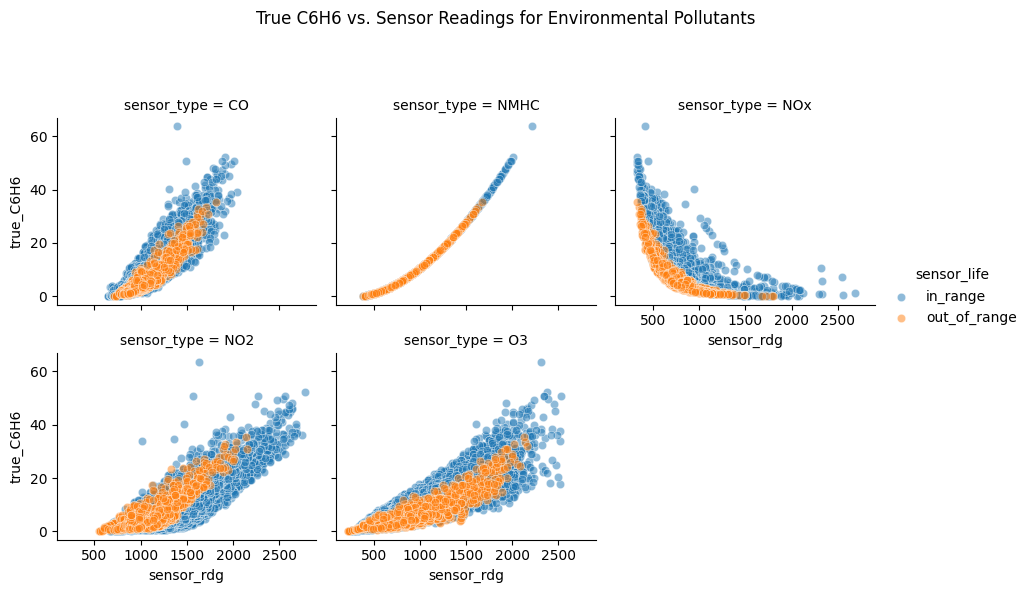

In [387]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "sensor_life",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for Environmental Pollutants")
plt.subplots_adjust(top=0.8) #tilte spacing




The true C6H6 vs. sensor reading scatter plots show lower spreads for in-range than for out-of-range sensor readings and true concentration values. It also looks like correaltion is pretty simliar, with slight differences only.

## True C6H6 and Weather Conditions

### Means and Standard Deviations of True C6H6 by Weather Condition Levels

In [388]:
air_qu.groupby("temp_label").\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))


/tmp/ipython-input-1454147300.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  air_qu.groupby("temp_label").\


,mean_C6H6,std_C6H6
temp_label,,
High Temp,11.501027,7.412142
Low Temp,8.791456,7.247147


The mean C6H6 is about 2 lower for the C6H6, which is pretty small, and the standard deviation is the same. The standard devivations are well over half the mean in both cases, so largely overlapping numbers.

In [389]:
air_qu.groupby("rh_label").\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))

/tmp/ipython-input-1441060555.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  air_qu.groupby("rh_label").\


,mean_C6H6,std_C6H6
rh_label,,
High RH,9.862769,8.102369
Low RH,10.309655,6.706436


The C6H6 mean for low relative humidity is about 0.5 higher than for high relative humidity, so an inverted relationship. Similar to the temperature results, the means are close and the standard deviations are well over half the mean values, so largely overlapping values.

In [390]:
air_qu.groupby("ah_label").\
    agg(mean_C6H6 = ("true_C6H6", "mean"),
        std_C6H6 = ("true_C6H6", "std"))

/tmp/ipython-input-1327592400.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  air_qu.groupby("ah_label").\


,mean_C6H6,std_C6H6
ah_label,,
High AH,11.137390,7.725130
Low AH,9.155978,7.071081


The C6H6 means for absolute humidity mimic the temperature results. The C6H6 mean for high absolute humidity is about two higher than for low humidity. Once again, the standard deviations are well over half the mean values indicating largely overlapping groups.

### Correlation coefficients between true C6H6 concentration and the weather  conditions

In [391]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "temp", "rel_hum", "abs_hum"]].corr().iloc[0, range(1, 4)]

Correlation Coefficicients


,true_C6H6
temp,0.198956
rel_hum,-0.061681
abs_hum,0.167972


The correlation coefficients do not indicate a relationship between weather conditions and true C6H6 values. Both temperature and absolute humidity show a low but positive corralation to C6H6 concentration (0.1990 and 0.1680, respectively), and relative huidity shows an even lower but negative correlation to C6H6 concetration (-0.0617).

### Scatter Plots of True C6H6 and Weather Conditions

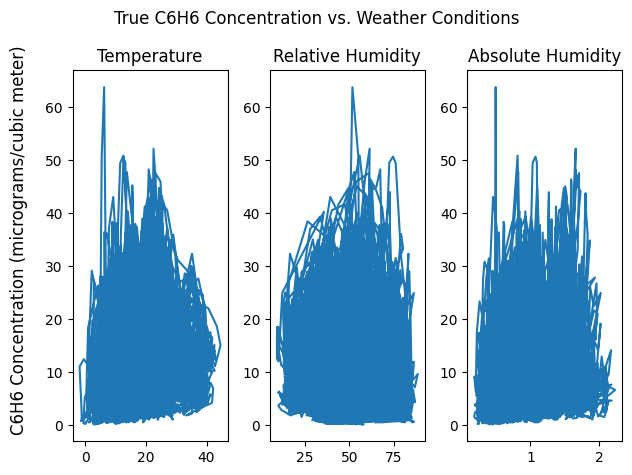

In [392]:
x1, x2, x3 = air_qu.temp, air_qu.rel_hum, air_qu.abs_hum
y = air_qu.true_C6H6

fig, ax = plt.subplots(1,3)
fig.suptitle("True C6H6 Concentration vs. Weather Conditions")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")

ax[0].plot(x1, y); ax[0].set_title("Temperature")
ax[1].plot(x2, y); ax[1].set_title("Relative Humidity")
ax[2].plot(x3, y); ax[2].set_title("Absolute Humidity")

fig.tight_layout()

The scatter plots above back up the findings from the correlation coefficients. Neither positive nor negative linear relationship is apparent in these graphs.

## True C6H6, Sensor Readings, and Weather Conditions

First create new columns to hold labels for categorical weather variables in preparation for pivoting to long data for the grouped scatter plots. Compare numeric values in weather condition columns to the mean of the column, and assign values gretaer than the mean to high and the rest to low.

### Correlation coefficients between true C6H6 concentration and sensor readings grouped by high and low temperature



In [393]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","temp_label"]]\
    .groupby("temp_label").corr()["true_C6H6"]

Correlation Coefficients


/tmp/ipython-input-1247730200.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("temp_label").corr()["true_C6H6"]


temp_label           
High Temp   true_C6H6    1.000000
            CO           0.897714
            NMHC         0.985597
            NOx         -0.779765
            NO2          0.856662
            O3           0.894023
Low Temp    true_C6H6    1.000000
            CO           0.893189
            NMHC         0.980114
            NOx         -0.717671
            NO2          0.752783
            O3           0.876572
Name: true_C6H6, dtype: float64

The correlation coefficients differed slightly between low and high temperature, with low tempearture showing smaller magnitudes than high temperature. The change was genearlly small. It was most noticeable with NO2, which decreased in magnitude by more than 10%.

### Scatter plots of true C6H6 vs. sensor readings for high and low temps

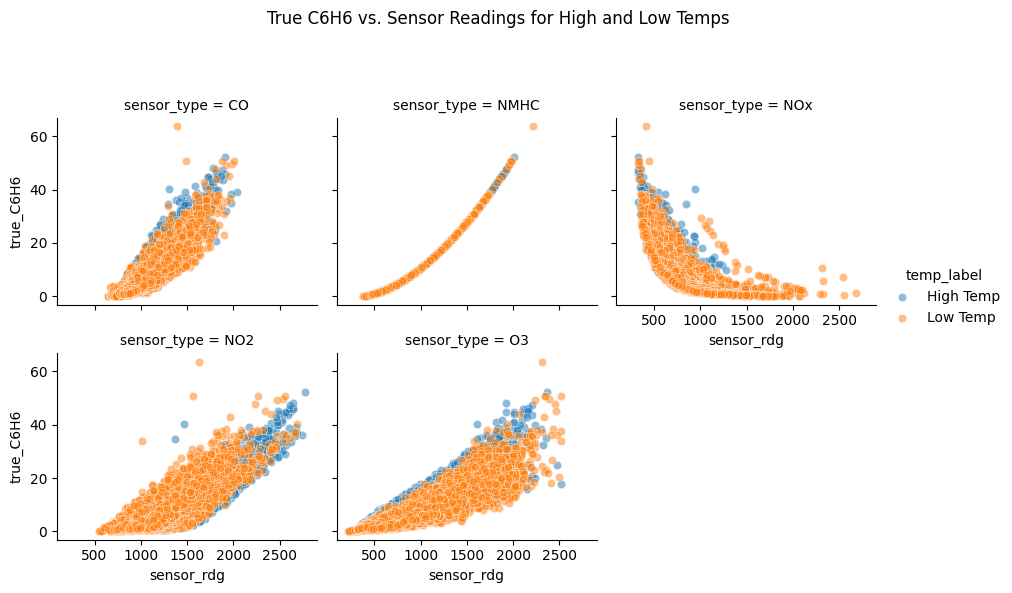

In [394]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "temp_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Temps")
plt.subplots_adjust(top=0.8) #title spacing

The sensor readings and true C6H6 values overlap almost completely, perhaps less so with NO2, lining up with the lower correlation coefficient value for NO2.

### Correlation coefficients between true C6H6 concentration and sensor readings grouped by high and low relative humidity

In [395]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","rh_label"]]\
    .groupby("rh_label").corr()["true_C6H6"]

Correlation Coefficients


/tmp/ipython-input-3724391273.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("rh_label").corr()["true_C6H6"]


rh_label           
High RH   true_C6H6    1.000000
          CO           0.906049
          NMHC         0.982115
          NOx         -0.748358
          NO2          0.790484
          O3           0.879797
Low RH    true_C6H6    1.000000
          CO           0.874729
          NMHC         0.982895
          NOx         -0.726775
          NO2          0.751992
          O3           0.877138
Name: true_C6H6, dtype: float64

The correlation coefficients for low humidity show means of barely lower magnitude for low relative humidity values.

### Scatter plots of true C6H6 vs. sensor readings grouped for high and low relative humidity

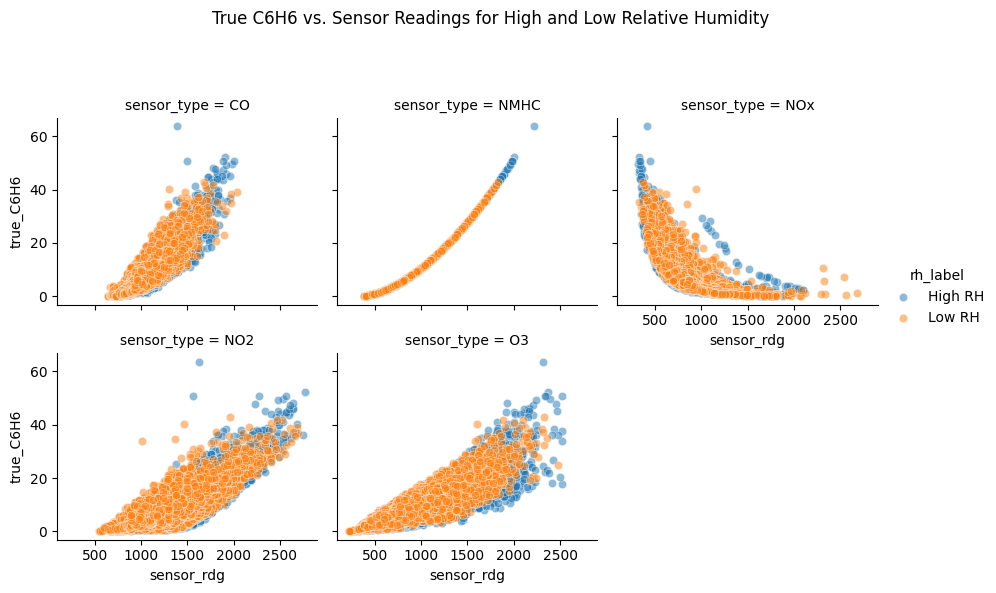

In [396]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "rh_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.5)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Relative Humidity")
plt.subplots_adjust(top=0.8) #title spacing

The data points for high and low relative humidity show almost complete overlap, more so than temperature, corresponding to the very small changes in calculated correlation values.

### Correlation coefficients between true C6H6 concentration and sensor readings for high and low absolute humidity

In [397]:
print("Correlation Coefficients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3","ah_label"]]\
    .groupby("ah_label").corr()["true_C6H6"]

Correlation Coefficients


/tmp/ipython-input-1332911344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("ah_label").corr()["true_C6H6"]


ah_label           
High AH   true_C6H6    1.000000
          CO           0.908840
          NMHC         0.984907
          NOx         -0.793286
          NO2          0.879506
          O3           0.899364
Low AH    true_C6H6    1.000000
          CO           0.867022
          NMHC         0.980702
          NOx         -0.704256
          NO2          0.773047
          O3           0.854401
Name: true_C6H6, dtype: float64

The correlation values are all lower magnitude for low absolute value observations than for high absolute value observations. NO2 again stands out with a change over 10%.

### Scatter plots of true C6H6 vs. sensor readings for high and low absolute humidity

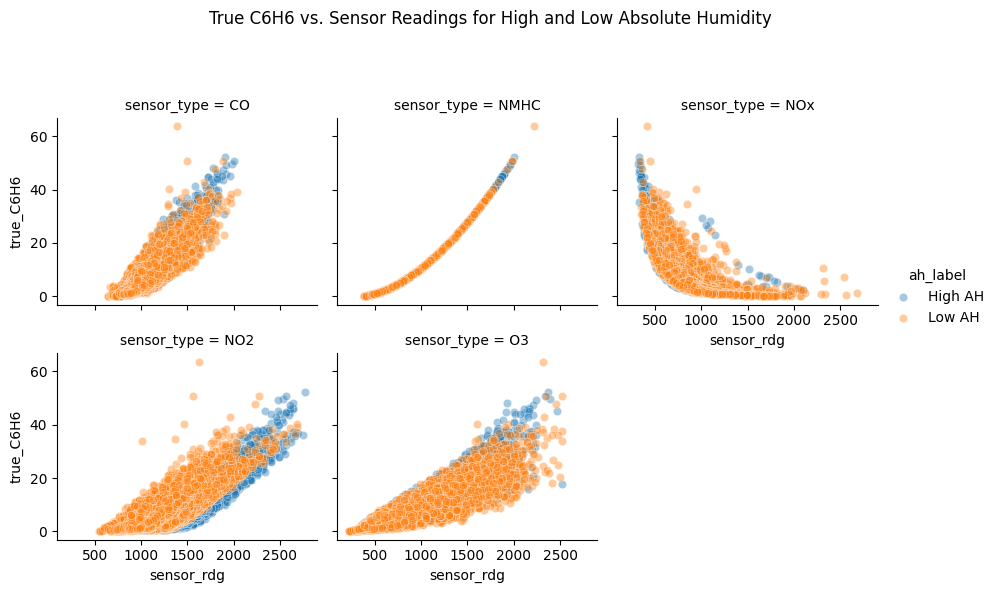

In [398]:
#make layout for plots
layout = sns.FacetGrid(long_data, col = "sensor_type", hue = "ah_label",
                       col_wrap = 3)

#map the plots to the layout
layout.map(sns.scatterplot, "sensor_rdg", "true_C6H6", alpha = 0.4)

#add legend and title
layout.add_legend()
layout.fig.suptitle("True C6H6 vs. Sensor Readings for High and Low Absolute Humidity")
plt.subplots_adjust(top=0.8) #title spacing

There is much overlap betweent the high and low absolute value observations, with NO2 sensor readings standing out for less overlap than the others. These plots look similar to the temperature plots. Tihs is a similar result to the temperature grouped correlation and scatter plots for these variables.

## Time Series Summaries

### Over the Time Span of the Study

#### Table of Means for True C6H6 and Sensor Readings By Month of the Study

In [399]:
air_qu.groupby("month_year").mean(["true_C6H6"])[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3"]]

/tmp/ipython-input-1685154507.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  air_qu.groupby("month_year").mean(["true_C6H6"])[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3"]]


,true_C6H6,CO,NMHC,NOx,NO2,O3
month_year,,,,,,
3_2004,9.932745,1222.819608,935.643137,1029.172549,1572.072549,1027.494118
4_2004,10.389177,1162.849928,949.210678,935.629149,1610.744589,1004.051948
5_2004,10.219041,1076.664384,951.094521,947.494521,1601.101370,928.206849
6_2004,10.595748,1020.793255,966.379765,900.467742,1722.376833,937.611437
7_2004,10.599462,1046.434724,971.480485,804.886945,1643.823688,994.452221
8_2004,6.993669,981.060432,838.484892,835.851799,1580.941007,777.385612
9_2004,11.554558,1081.561254,993.508547,810.410256,1546.727920,1036.431624
10_2004,13.525303,1184.913863,1058.433378,688.139973,1636.950202,1163.850606
11_2004,12.511806,1132.148611,1011.201389,789.880556,1372.234722,1171.354167


#### True C6H6 Concentration and Sensor Readings

Text(0.5, 1.0, 'Sensor Readings Over Time (Monthly Averages)')

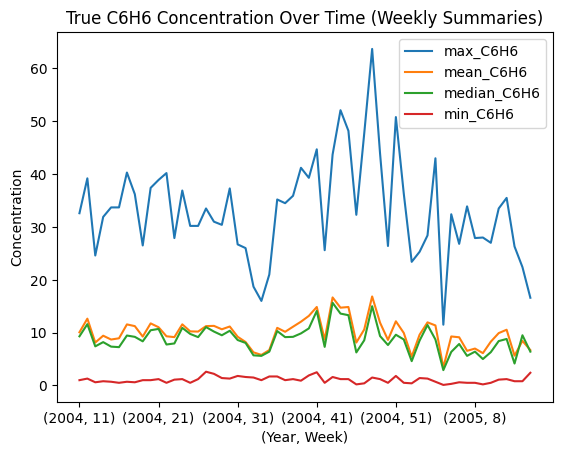

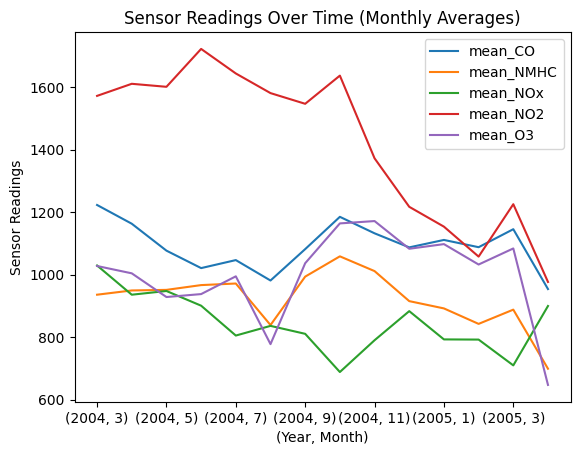

In [400]:
air_qu.groupby(["year", "week"]).\
    agg(max_C6H6 = ("true_C6H6", "max"),
        mean_C6H6 = ("true_C6H6", "mean"),
        median_C6H6 = ("true_C6H6", "median"),
        min_C6H6 = ("true_C6H6", "min"))\
    .plot(kind = "line")
plt.xlabel("(Year, Week)")
plt.ylabel("Concentration")
plt.title("True C6H6 Concentration Over Time (Weekly Summaries)")

air_qu.groupby(["year", "month"]).\
    agg(mean_CO = ("CO", "mean"),
        mean_NMHC = ("NMHC", "mean"),
        mean_NOx = ("NOx", "mean"),
        mean_NO2 = ("NO2", "mean"),
        mean_O3 = ("O3", "mean"))\
    .plot(kind = "line")
plt.xlabel("(Year, Month)")
plt.ylabel("Sensor Readings")
plt.title("Sensor Readings Over Time (Monthly Averages)")

The maximum values for C6H6 concentrations seem to have gone haywire toward the end of 2004, and the monthly average values for the NO2 sensor also begin to tank toward the end of 2004.

#### True C6H6 Concentration and Weather Conditions

/tmp/ipython-input-3489088631.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels = ["3", "4", "5", "6", "7", "8", "9",


Text(0.5, 1.0, 'C6H6 Concentration Over Study Timespan\nat High and Low Temperature')

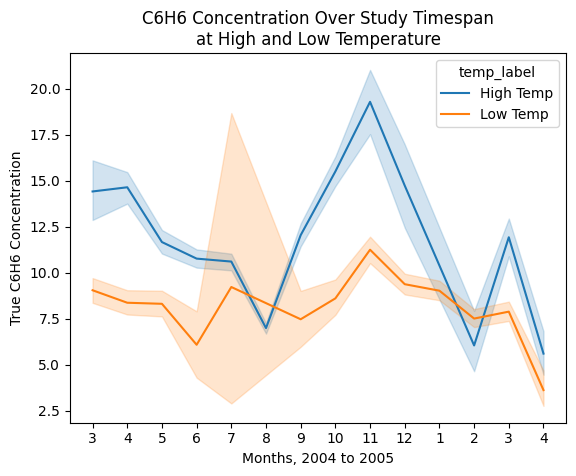

In [401]:
ax =  sns.lineplot(data = air_qu, x = "month_year", y = "true_C6H6", hue = "temp_label")
ax.set(xticklabels = ["3", "4", "5", "6", "7", "8", "9",
                      "10", "11", "12", "1", "2", "3", "4"],
       xlabel = "Months, 2004 to 2005", ylabel = "True C6H6 Concentration")
ax.set_title("C6H6 Concentration Over Study Timespan\nat High and Low Temperature")

The high-temperature C6H6 monthly average is generally higher than the low-temperature average over the course of the study, with a couple of exceptions. This corresponds well to the slightly higher mean C6H6 concentration calculated for high-temperature vs. low-temperature measurements.

/tmp/ipython-input-1417543789.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels = ["3", "4", "5", "6", "7", "8", "9",


Text(0.5, 1.0, 'C6H6 Concentration Over Study Timespan\nat High and Low Relative Humidity')

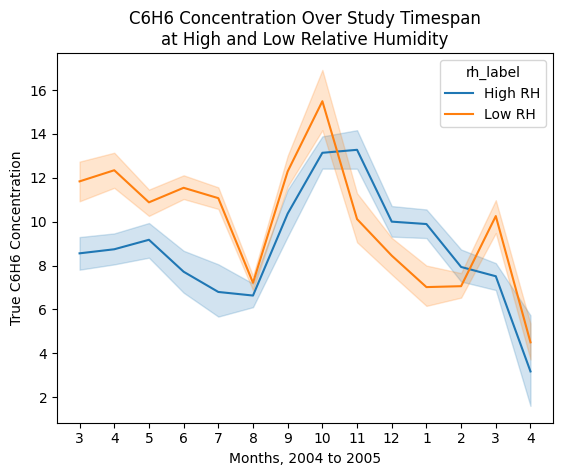

In [402]:
ax =  sns.lineplot(data = air_qu, x = "month_year", y = "true_C6H6", hue = "rh_label")
#plt.title("C6H6 Concentration Over Study Timespan\nat High and Low Relative Humidity")
#plt.xlabel("Month/Year")
#plt.ylabel("True C6H6 Concentration")
ax.set(xticklabels = ["3", "4", "5", "6", "7", "8", "9",
                      "10", "11", "12", "1", "2", "3", "4"],
       xlabel = "Months, 2004 to 2005", ylabel = "True C6H6 Concentration")
ax.set_title("C6H6 Concentration Over Study Timespan\nat High and Low Relative Humidity")

In contrast to the high and low temperature plot, the high relative humidity monthly average for C6H6 was usually, but not always, lower than the low-relative humidity monthly averages. The average value the high relative humidity mean C6H6 was also a bit lower than for the low relative humidity mean.

/tmp/ipython-input-2456927063.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels = ["3", "4", "5", "6", "7", "8", "9",


Text(0.5, 1.0, 'C6H6 Concentration Over Study Timespan\nat High and Low Absolute Humidity')

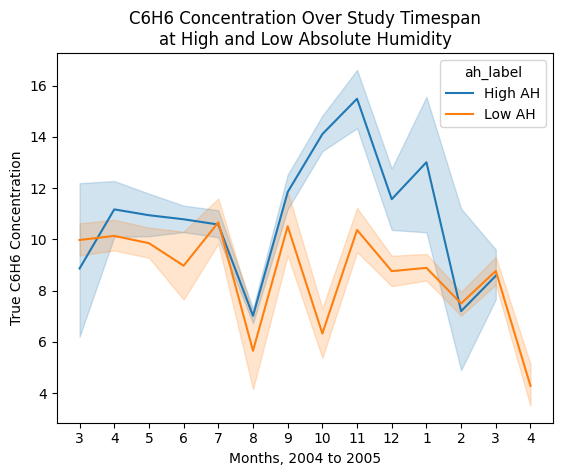

In [403]:
ax =  sns.lineplot(data = air_qu, x = "month_year", y = "true_C6H6", hue = "ah_label")
ax.set(xticklabels = ["3", "4", "5", "6", "7", "8", "9",
                      "10", "11", "12", "1", "2", "3", "4"],
       xlabel = "Months, 2004 to 2005", ylabel = "True C6H6 Concentration")
ax.set_title("C6H6 Concentration Over Study Timespan\nat High and Low Absolute Humidity")

Similar to the high and low temperature results, the high absolute humidity C6H6 monthly average was usaully higher than the low absolute humidity average, but not as decisively. The high absolute value mean C6H6 was also higher than the low absolute value mean.

### Over the Hours of the Day

#### Table of Means for True C6H6 and Sensor Readings By Hour of Day

In [408]:
air_qu.groupby("hour").mean(["true_C6H6"])[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3"]]

,true_C6H6,CO,NMHC,NOx,NO2,O3
hour,,,,,,
0,7.684140,1065.008065,869.311828,848.615591,1387.413978,999.086022
1,5.991711,1003.823529,795.973262,912.919786,1329.358289,902.911765
2,4.379467,943.925333,715.544000,1002.032000,1274.546667,802.816000
3,3.379255,904.082447,658.513298,1081.172872,1238.138298,733.337766
4,2.916711,884.766578,630.899204,1120.830239,1221.496021,700.159151
5,3.068435,892.095491,641.435013,1107.100796,1231.594164,713.312997
6,4.756117,953.122340,731.231383,999.332447,1301.877660,814.045213
7,10.398936,1113.428191,944.114362,829.787234,1508.906915,1048.103723
8,15.894149,1238.303191,1130.505319,701.486702,1692.119681,1261.603723


#### C6H6 Concentration and Sensor Readings

Text(0.5, 1.0, 'Sensor Readings Over Hours of the Day (Hourly Means)')

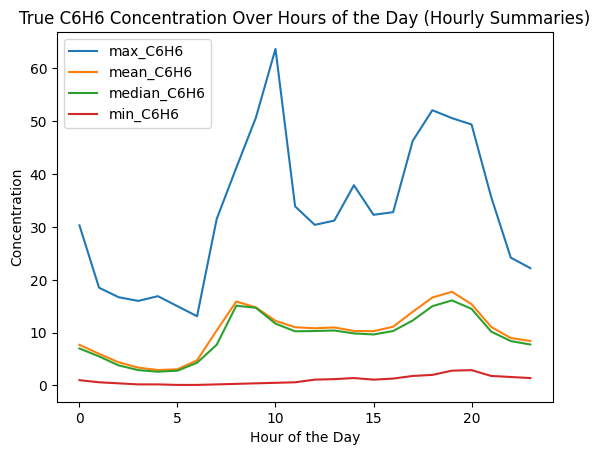

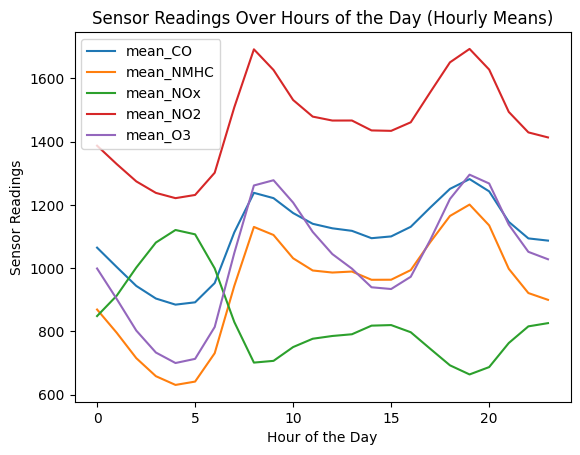

In [404]:
air_qu.groupby("hour").\
    agg(max_C6H6 = ("true_C6H6", "max"),
        mean_C6H6 = ("true_C6H6", "mean"),
        median_C6H6 = ("true_C6H6", "median"),
        min_C6H6 = ("true_C6H6", "min"))\
    .plot(kind = "line")
plt.xlabel("Hour of the Day")
plt.ylabel("Concentration")
plt.title("True C6H6 Concentration Over Hours of the Day (Hourly Summaries)")

air_qu.groupby("hour").\
    agg(mean_CO = ("CO", "mean"),
        mean_NMHC = ("NMHC", "mean"),
        mean_NOx = ("NOx", "mean"),
        mean_NO2 = ("NO2", "mean"),
        mean_O3 = ("O3", "mean"))\
    .plot(kind = "line")
plt.xlabel("Hour of the Day")
plt.ylabel("Sensor Readings")
plt.title("Sensor Readings Over Hours of the Day (Hourly Means)")

Over the course of a day, the hourly average C6H6 concentration is lowest in the very early morning, peaks twice, once later in the morning and again in the evening. Late in the night the value goes down again toward the trough in the very early morning. The monthly average C0, NMHC, and O3 sensor readings follow a similar trajectory and have similar values to each other. The NO2 trajectory is also similar, but at a higher value than the other sensors. The NOx sensor is inverted from the rest - peaking when the others are in a trough and going down when the others are peaking. THe No2 sensor also had negative correlation coefficients with true C6H6 in contrats to the positive values for the other sensors.

#### C6H6 Concentration and Wether Conditions

Text(0, 0.5, 'True C6H6 Concentration')

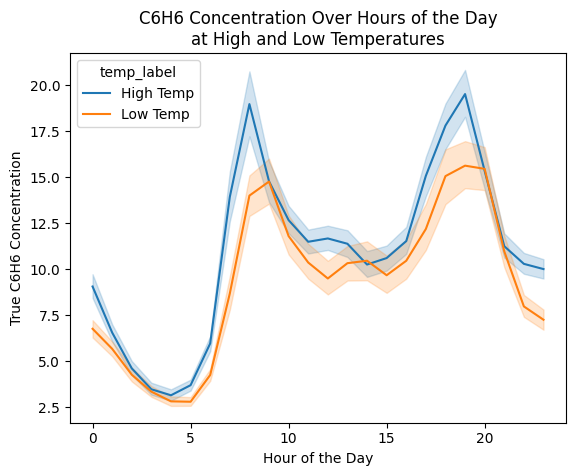

In [405]:
sns.lineplot(data = air_qu, x = "hour", y = "true_C6H6", hue = "temp_label")
plt.title("C6H6 Concentration Over Hours of the Day\nat High and Low Temperatures")
plt.xlabel("Hour of the Day")
plt.ylabel("True C6H6 Concentration")

Text(0, 0.5, 'True C6H6 Concentration')

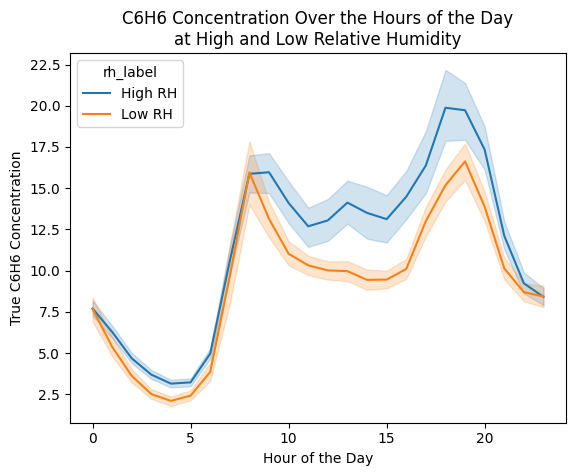

In [406]:
sns.lineplot(data = air_qu, x = "hour", y = "true_C6H6", hue = "rh_label")
plt.title("C6H6 Concentration Over the Hours of the Day\nat High and \
Low Relative Humidity")
plt.xlabel("Hour of the Day")
plt.ylabel("True C6H6 Concentration")

Text(0, 0.5, 'True C6H6 Concentration')

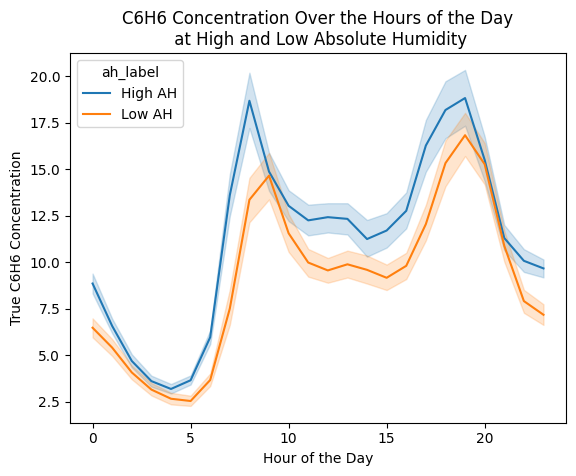

In [407]:
sns.lineplot(data = air_qu, x = "hour", y = "true_C6H6", hue = "ah_label")
plt.title("C6H6 Concentration Over the Hours of the Day\n at High and Low \
Absolute Humidity")
plt.xlabel("Hour of the Day")
plt.ylabel("True C6H6 Concentration")

The shapes of the plots for C6H6 concentration over the hours of the day grouped by high and low weather variables are very simlar to each other, and similar to the majority of the sensor reading plots over the course of a day - comparatively very low very early in the morning, high in the late morning and evening, and low again late at night.

# Conclusions


*   True C6H6 concentration correlates very strongly to all varieties of sensor reading, but the most strongly to the NMHC sensor. The strength of the correaltion(nearly one) was not weakened by weather conditions.
*   The NOx pollutant behaves differently than the others. It is negatively correlated to true C6H6 while the other pollutants are positively correlated, and it goes up and down in opposition to the others over the course of a day.
*   The levels of true C6H6 and the other environmental pollutants are very senstive to time of day, presumably due to commuting patterns and vehicle emissions.
*   There is not strong correlation between true C6H6 concentration and weather conditions.

